In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df =  pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_df, clinical_df,how='outer', on='Mouse ID')
combine_df.head()

# Display the data table for preview
organize_df=combine_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug"]]
organize_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn
5,f234,25,52.178602,2,Stelasyn
6,f234,30,56.873817,2,Stelasyn
7,f234,35,57.748758,2,Stelasyn
8,x402,0,45.000000,0,Stelasyn
9,x402,5,46.327570,1,Stelasyn


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group=organize_df.groupby(["Drug","Timepoint"])
tumor_group

# Convert to DataFrame

# Preview DataFrame
new_df = pd.DataFrame(tumor_group["Tumor Volume (mm3)"].mean())
new_df.reset_index()
new_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

new_df["Volume SEM"] = new_df['Tumor Volume (mm3)'].sem()
new_df.reset_index(inplace = True)
new_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#for i in range(0, len(new_df1)):
  #  print(new_df1.iloc[i]['Drug' =='Capomulin'], new_df1.iloc[i]['Drug'=='Ceftamin'])
# Preview that Reformatting worked
tumor_pivot = new_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:

tumor_response_sem = new_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


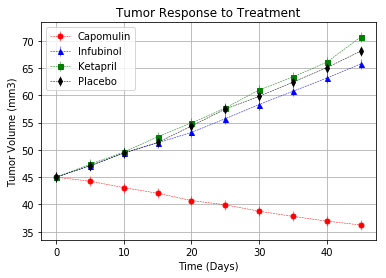

In [19]:
# Generate the Plot (with Error Bars)

# Save the Figure
plt.errorbar(tumor_pivot.index, tumor_pivot['Capomulin'], yerr=tumor_response_sem['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_pivot.index, tumor_pivot['Infubinol'], yerr=tumor_response_sem['Infubinol'],
             color='b', marker='^', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_pivot.index, tumor_pivot['Ketapril'], yerr=tumor_response_sem['Ketapril'],
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_pivot.index, tumor_pivot['Placebo'], yerr=tumor_response_sem['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_pivot.index)
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/ Tumor Response")
plt.legend(loc='upper left')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_group=organize_df.groupby(["Drug","Timepoint"])
tumor_group

# Convert to DataFrame

# Preview DataFrame
met_df = pd.DataFrame(tumor_group["Metastatic Sites"].mean())
met_df.reset_index(inplace=True)
met_df.head()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_df1 = tumor_group['Metastatic Sites'].sem()
met_df2=pd.DataFrame(met_df1)
met_df2.reset_index(inplace = True)
met_df2.head()
# Reshaping the data frame using Pivot Table

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_pivot = met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')  
metastatic_response_pivot.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [15]:
met_response_sem = met_df2.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
met_response_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


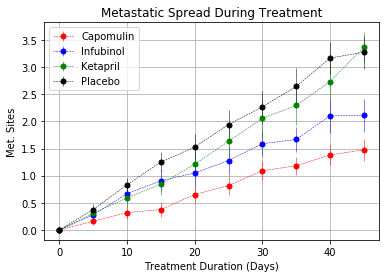

In [16]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=met_response_sem['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=met_response_sem['Infubinol'],
             color='b', marker='^', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=met_response_sem['Ketapril'],
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=met_response_sem['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)


plt.title("Metastatic Spread During Treatment")
plt.grid()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.savefig("Images/ Metastatic Response")
plt.legend(loc='upper left')

# Show the Figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
tumor_group=organize_df.groupby(["Drug","Timepoint"])
tumor_group

# Convert to DataFrame

# Preview DataFrame
mice_df = pd.DataFrame(tumor_group["Mouse ID"].count())
mice_df.reset_index(inplace=True)
mice_df.head()
# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = mice_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID') 
mice_pivot
# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

plt.errorbar(mice_pivot.index, mice_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(mice_pivot.index, mice_pivot['Infubinol'], 
             color='b', marker='^', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(mice_pivot.index, mice_pivot['Ketapril'], 
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(mice_pivot.index, mice_pivot['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='best')
plt.savefig("Images/Survival Rate")
plt.grid()
# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

tumor_volume_change_percentage =  ((tumor_pivot.iloc[-1]-tumor_pivot.iloc[0])/tumor_pivot.iloc[0]) * 100
tumor_volume_change_percentage
# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple

new_tuple=list(tumor_volume_change_percentage)
print(new_tuple)
drug_name=tumor_volume_change_percentage.index
drug_name=list(drug_name)
print(drug_name)

#Capomulin   -19.475303
#Infubinol    46.123472
#Ketapril     57.028795
#Placebo      51.297960

# Splice the data between passing and failing drugs
passing_drug=[]
failing_drug=[]
for i in new_tuple:
    passing_drug.append(i>=0)
print(passing_drug)

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.savefig("% Tumor Volume Change")
plt.show()
# Show the Figure
